# Models

##Package Imports & Helper Functions

In [ ]:
!pip install --upgrade pip --user
!pip install pydotplus --user
!pip install graphviz --user
!pip install ipython --user
!sudo apt-get install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.4 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

#Trees
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#Linear Models
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

#Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Model tuning
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score

#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mainfilename = "/content/drive/MyDrive/CIS5450/Term_Project/data/main.csv"
main_df = pd.read_csv(mainfilename)
main_df = main_df.rename(columns={"room_type_Entire home/apt": "room_type_Entire", "room_type_Hotel room": "room_type_Hotel", "room_type_Private room": "room_type_Private", "room_type_Shared room": "room_type_Shared"})
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66771 entries, 0 to 66770
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   airbnb_price                    66771 non-null  float64
 1   minimum_nights                  66771 non-null  int64  
 2   number_of_reviews               66771 non-null  int64  
 3   last_review                     50686 non-null  object 
 4   reviews_per_month               66771 non-null  float64
 5   num_listings                    66771 non-null  int64  
 6   price                           66771 non-null  float64
 7   cost_fl_area                    66771 non-null  float64
 8   room_type_Entire                66771 non-null  int64  
 9   room_type_Hotel                 66771 non-null  int64  
 10  room_type_Private               66771 non-null  int64  
 11  room_type_Shared                66771 non-null  int64  
 12  borough_Camden                  

#Is an active STR sector within a borough positively correlated with increased housing costs?

We denote the independent variable as the count of STR listings, num_listings. The dependent variable as purchase price for housing, price.



Let's assume the true model is given by,

$$ \text{Cost per m2} \approx \beta_0+\beta_1 X_{\text{num_listings}}+\epsilon$$


Null Hypothesis
$H_0:$ No relationship between $X$ and $Cost per m2$

A large p-value: We fail to reject the null hypothesis at a particular significance level.

In [ ]:
data_copy = main_df.copy()

X_1 = data_copy[['num_listings']]

model = smf.ols('cost_fl_area ~ num_listings', data=data_copy)
res = model.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:           cost_fl_area   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                 2.222e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:29:37   Log-Likelihood:            -6.2239e+05
No. Observations:               66771   AIC:                         1.245e+06
Df Residuals:                   66769   BIC:                         1.245e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5502.9243     29.565    186.130   


For every unit increase in number of airbnb listings the cost per meter square increases by 0.6793% while holding other features constant.

How would the model change if we included other features of airbnb data?

We could explore a multiregression model first using the following features:


*   num_listings
*   number_of_reviews
*   room_types: Entire home/apt, Hotel room, Private room, Shared room, and minimum nights

Perhaps our model could be:

 $$ \text{Housing price} \approx \beta_0+\beta_1 X_{\text{num_listings}}+\beta_2 X_{\text{num_of_reviews}}+\beta_3 X_{\text{minimum nights}}+\beta_4 X_{\text{entire home}}+\beta_5 X_{\text{hotel room}}+\beta_6 X_{\text{private room}}+\beta_7 X_{\text{shared room}}+\epsilon$$


In [ ]:
X_2 = data_copy[['num_listings', 'number_of_reviews', 'minimum_nights', 'room_type_Entire', 'room_type_Hotel', 'room_type_Private', 'room_type_Shared']]
model_2 = smf.ols('cost_fl_area ~' + ' + '.join([i for i in X_2.columns]), data=data_copy)

res = model_2.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:           cost_fl_area   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     4540.
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:30:08   Log-Likelihood:            -6.2056e+05
No. Observations:               66771   AIC:                         1.241e+06
Df Residuals:                   66764   BIC:                         1.241e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4867.8609     39.14

Interestingly, the p-value for minimum_nights is quite high.

For every unit increase in number of airbnb listings the cost per meter square increases by 0.6504% while holding other features constant.

The significant predictors seem to be: number of airbnb listings, number of reviews, and minimum_nights. Yet, due to he high p-value in minimum_nights, we will keep only the number of listings and number of reviews from this dataset.

# Split the training data and testing data
Number of airbnb listings (num_listings) and number of reviews (number_of_reviews) are feature columns, will be treated as X.

We won't be scaling the data, for now as our first model will be a random forest, which is scale invariant.

80% of the data will be used for training, 20% of the data will be used for testing.

In [ ]:
final_X = data_copy[['num_listings', 'number_of_reviews']]
y = data_copy['cost_fl_area']

# split into test/train
X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size=0.2, random_state=42)

# Decision Tree Regression

### Fine-tuning depth to lessen over-fitting

In [ ]:
# final_X = data_copy[['num_listings', 'number_of_reviews']]

final_X = data_copy['num_listings'].values
y = data_copy['cost_fl_area'].values

# split into test/train
X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size=0.2, random_state=42)


# Fitting Decision Tree Regression to the dataset
regressor = DecisionTreeRegressor()
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

# prediction
y_pred = regressor.predict(X_test.reshape(-1,1))

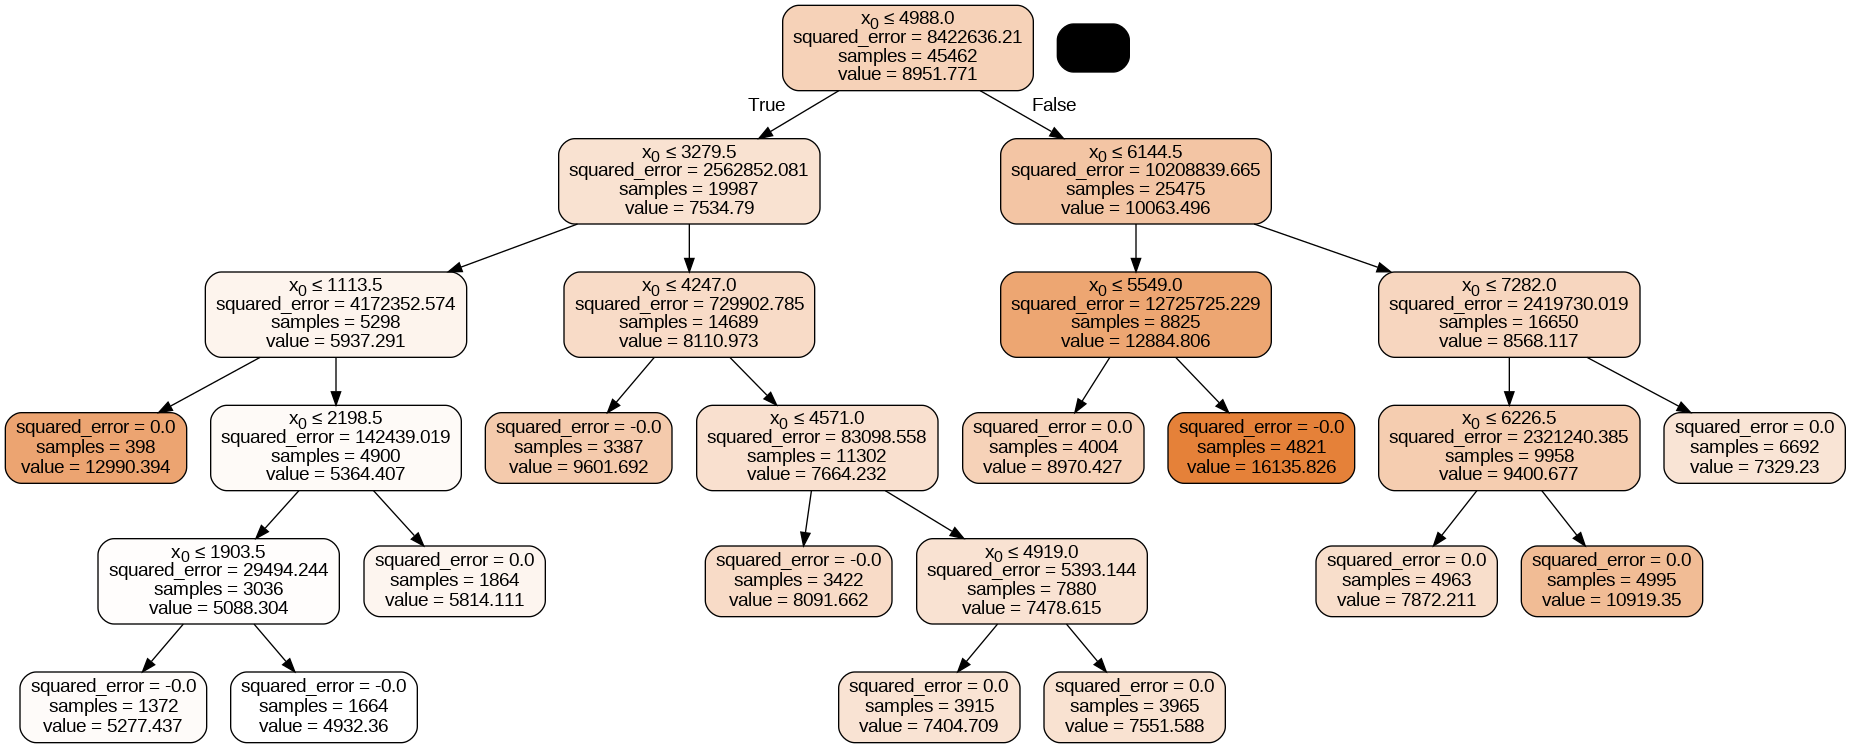

In [ ]:
dot_data = tree.export_graphviz(regressor, out_file=None,
                            filled=True,
                            rounded=True,
                            special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
#img = Image(graph.create_png())
Image(graph.create_png())

In [ ]:
# model
regr_1 = DecisionTreeRegressor(max_depth=1)
regr_2 = DecisionTreeRegressor(max_depth=2)
regr_3 = DecisionTreeRegressor(max_depth=3)

# train
regr_1.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
regr_2.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
regr_3.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

# predict
y_1 = regr_1.predict(X_test.reshape(-1,1))
y_2 = regr_2.predict(X_test.reshape(-1,1))
y_3 = regr_3.predict(X_test.reshape(-1,1))

## Decision Tree MSE

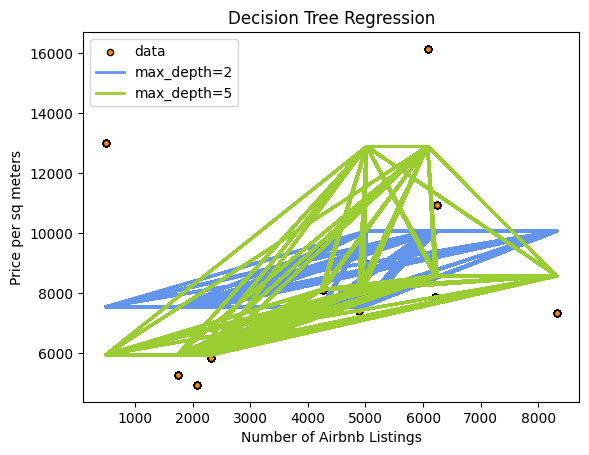

In [ ]:
plt.figure()
plt.scatter(final_X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Number of Airbnb Listings")
plt.ylabel("Price per sq meters")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Random Forest



Although Random Forest is mainly a classification model, in this case, we will be looking at it for regression purposes. Rather than predicting a label or class, we will be be predicting the square meter cost.

In [ ]:
#Random Forest Classifier
regr = RandomForestRegressor()

# train the model
regr.fit(X_train, y_train)

# make predictions
y_pred = regr.predict(X_test)

### Random Forest MSE

We will use MSE to measure efficacy of model.

In [ ]:
from sklearn import metrics

# let's get the mse in order to evaluate performance
mse = metrics.mean_squared_error(y_test, y_pred)

# root of mse - prediction error magnitude
rmse = mse**0.5

print(mse)
print(rmse)

4.4237757652473296e-20
2.1032773866628552e-10


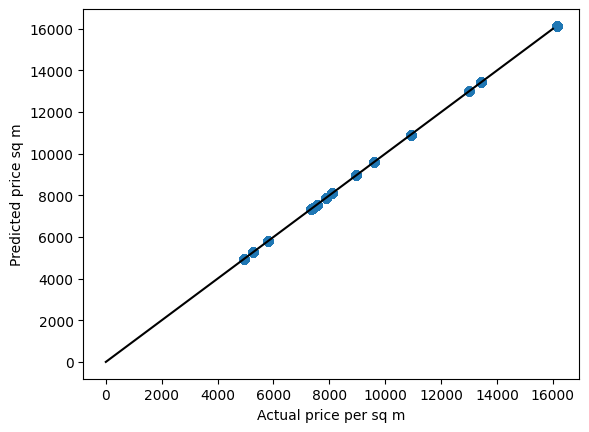

In [ ]:
# let's visualize the predictions against the actual values

plt.scatter(y_test, y_pred)
plt.ylabel('Predicted price sq m')
plt.xlabel('Actual price per sq m')
plt.plot([0,16000], [0,16000], 'black')

Our plot indicates a very accurate prediction - possibly an overfitting.

Due to overfitting, we should consider cross-validation.

## Cross validation to find the optimal values

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor

For our random forest, we will optimize the following parameters:

* *n_estimators* = number of trees we want to build

* *max_depth* = maximum depth of each tree

* *max_features* = the number of features for splitting






In [ ]:
param_grid = {
    'max_depth': [5,10,20],
    'max_features' : [5,10,20],
    'n_estimators': [20,50]}


## GridSearch CV

We will use gridsearch cv to help us tune hyperparameters.
The parameters we'll be using of GridSearch CV are:
* estimator: the model instance.
* params_grid: the dictionary object that holds the hyperparameters we want to adjust
* cv: number of cross-validation, in this case due to the large dataset we will do 3 splits. That means 2 splits will be kept for training, and one for testing.

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=0),
                           param_grid=param_grid,cv = KFold(n_splits=3, shuffle=True, random_state=1), scoring = "neg_mean_squared_error")


In [ ]:
grid_search.fit(X_train, y_train)

# Let's take a look at the best parameters that GridSearchCV found for our data
grid_search.best_params_

{'max_depth': 10, 'max_features': 5, 'n_estimators': 50}

In [ ]:
# Let's use that model for our predictions
prediction = grid_search.predict(X_test)

## KFold MSE

KFold divides all the samples in groups of samples, called folds of equal sizes. There are k - 1 samples used during prediction and the last one during testing.

In [ ]:
mse = mean_squared_error(y_test, prediction)
print(mse)

# mse not very different from our original mse

4.5976073033442275e-20


In [ ]:
print(mean_squared_error(y_test,y_3))

545019.2187828895
